<a href="https://colab.research.google.com/github/ali-adel/Statistics_EDA/blob/main/23_ANOVA_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANOVA**

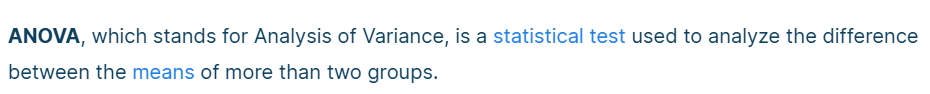

# **Assumptions of ANOVA**

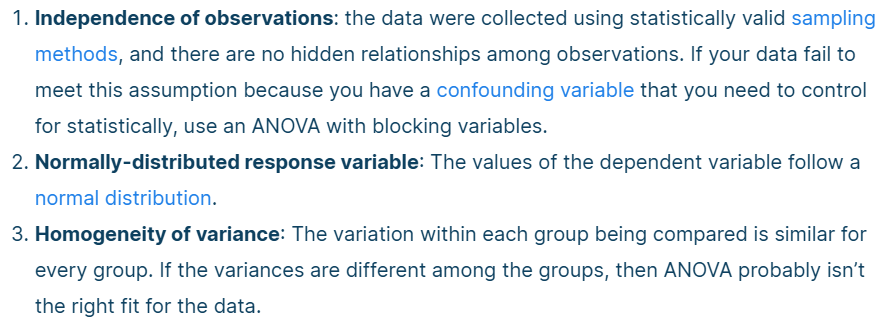

# **one-way ANOVA**

# Uses one independent variable (Ex : like the departement(independet) HR , Eng , Accounting) -> 3 groups

# **EX :**

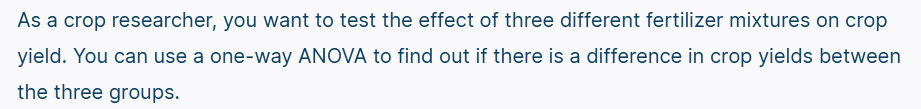

# fertilizer mixtures : مخلوط اسمده

# **F-distribution**



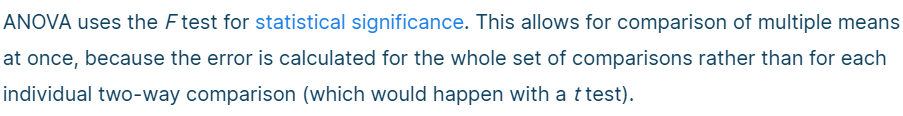

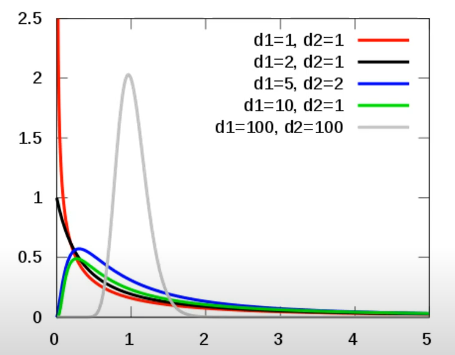

# Understanding

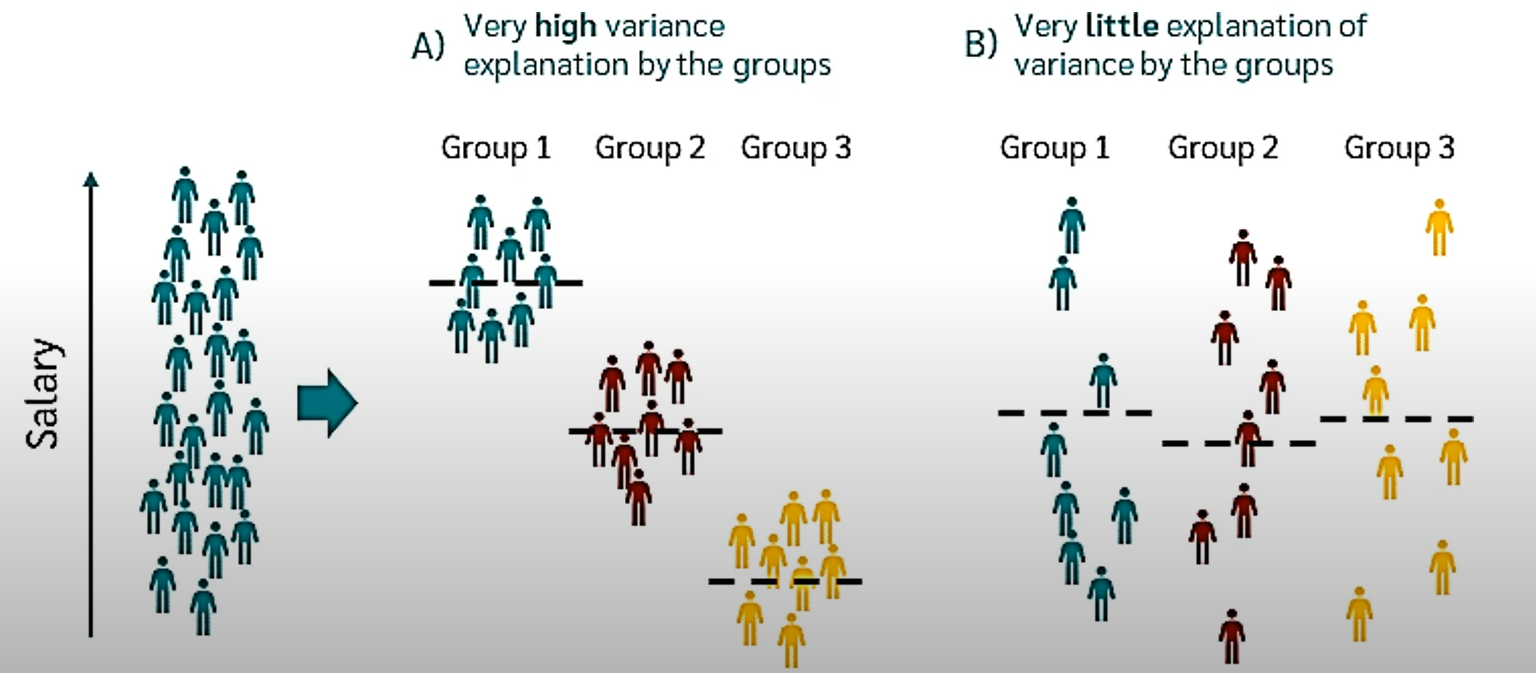

# **Keys**

* # Right Case : with the different in groups the they have almost the same variance (range in salary) (ex: from 2000 to 8000 ) ---> so the groups here don't affect the salary.

* # Left Case : each group have it's own variance and they are different in salary range -> so here the salary influence by group.

# **important definitions**

* # Grand mean : the mean for all data regardless  the group.

* # SST (sum of square difference (total)) :  represent the variance for the all data regardless  the group.

* # SSW (sum of square difference within group) : represent the variation within groups.

* # DOFW (degree of freedom for SSW) : N - M (N -> num of data points & m -> num of groups)

* # SSB (sum of square difference between group) :  represent the variation between groups.

* # DOFB (degree of freedom for SSB) : M - 1 (m -> num of groups)

# SST (Xi -> data point & x' -> grand mean)

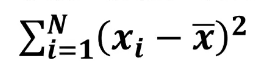

# SSW

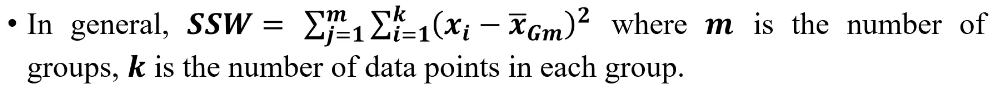

# DOFW (N -> num of samples & M -> num of groups)

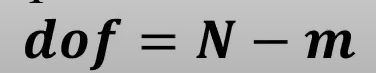

# SSB

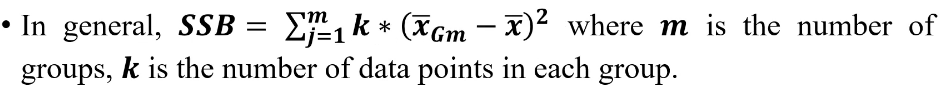

# DOFB (M -> num of groups)

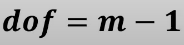

# **F-score Formula**


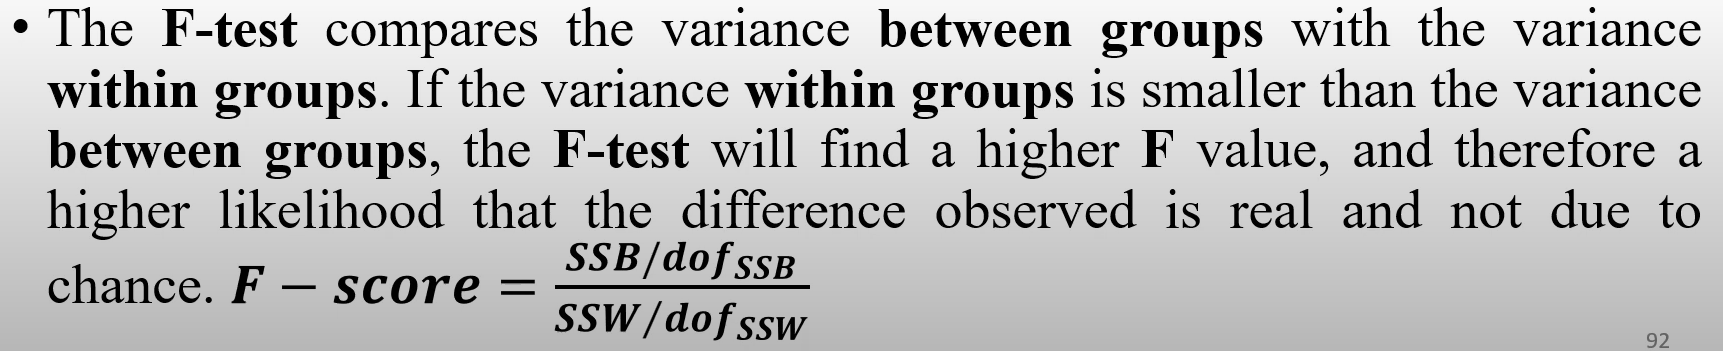

# **Ex :**


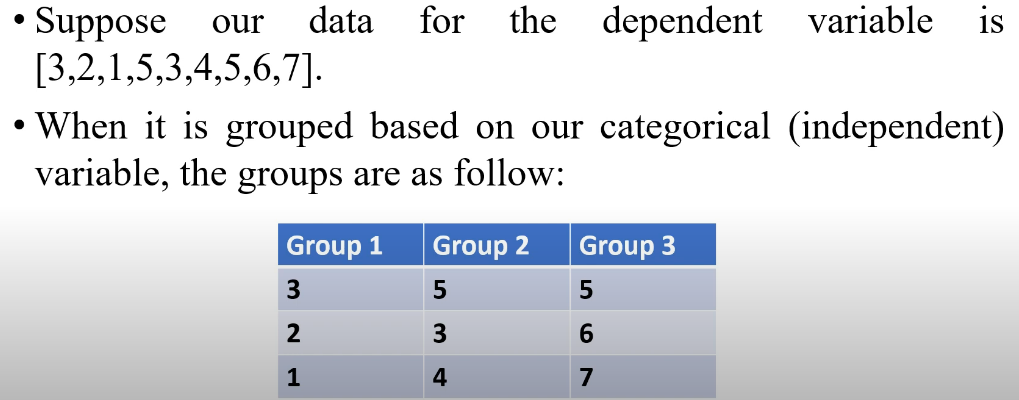

# Hypothesis

* H0 : there is no difference
* H1 : there are difference

# 1. Grand Mean

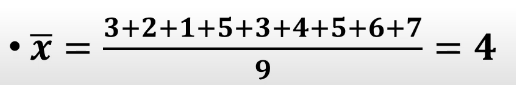

# 2. Mean for each group

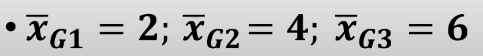

# 3. SST


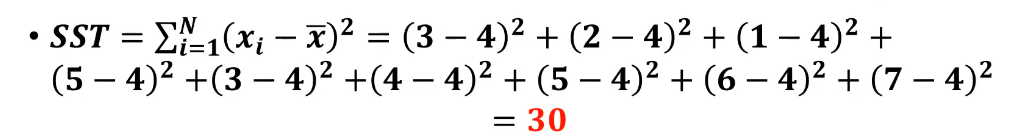

# 4. SSW and DOFW

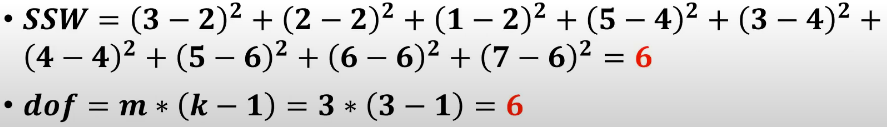

# 5. SSB and DOFB

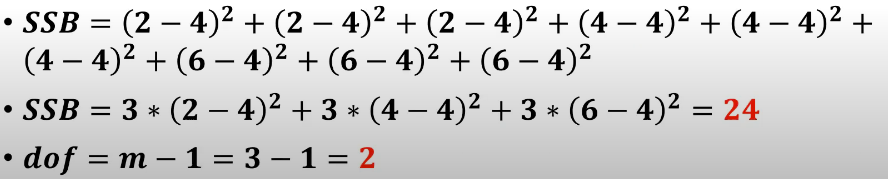

# Over All

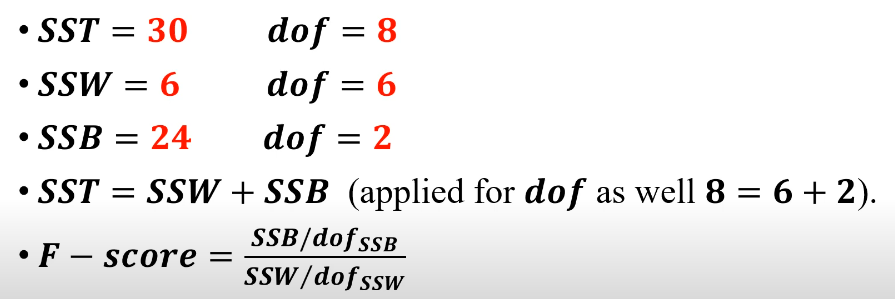

# Practical

In [58]:
from scipy.stats import f_oneway , f
import pandas as pd
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Ex : if there difference in the Class with respect to the age

* H0 : No difference
* H1 : there is a difference
* alpha : 0.05

<Axes: xlabel='Pclass', ylabel='Age'>

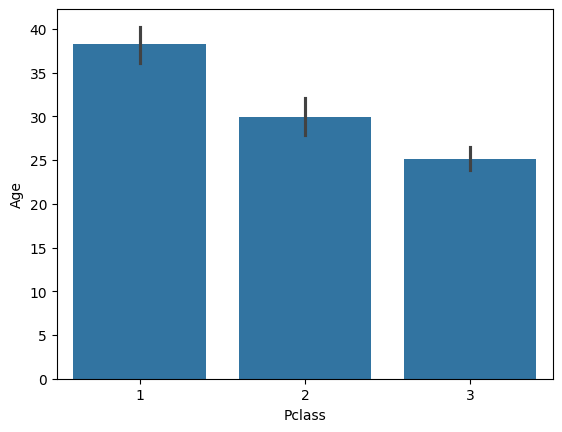

In [6]:
sns.barplot(data=df,x='Pclass',y='Age') # it seems that there pclass affect age (but is this staistically significante)

In [7]:
df_Ageclass = df[['Age','Pclass']].dropna()
df_Ageclass.head()

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


In [8]:
G1 = df_Ageclass.groupby('Pclass').get_group(1)['Age'].values
G2 = df_Ageclass.groupby('Pclass').get_group(2)['Age'].values
G3 = df_Ageclass.groupby('Pclass').get_group(3)['Age'].values

In [12]:
print(G1.var(),G2.var(),G3.var()) # the variance for each group is close for each other

217.9464537518788 194.89702964348956 155.6951596159492


In [9]:
f_oneway(G1,G2,G3) # pvalue < alpha so we reject Null Hypothesis there is a difference in the class depending on the Age

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

<Axes: xlabel='Pclass', ylabel='Age'>

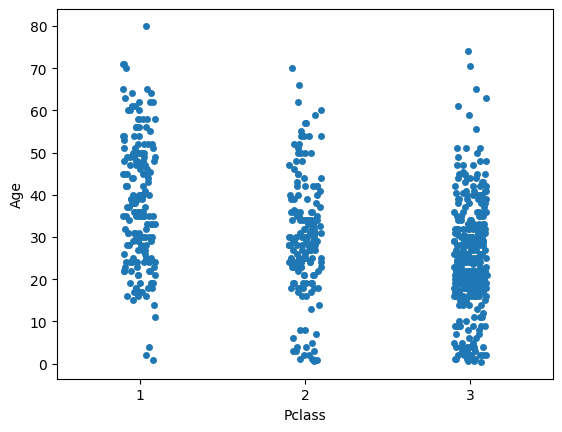

In [10]:
sns.stripplot(data = df_Ageclass,x='Pclass',y='Age') # Although teh variance is looking equal for the 3 groups but it is statistically significant and there is a difference (this because of the outliers)

In [27]:
df_Ageclass.count()

Age       714
Pclass    714
dtype: int64

In [20]:
dofW = 714 - 3
dofW

711

In [19]:
dofB = 3-1
dofB

2

In [46]:
f.sf(57.443484340676214,dofB,dofW)  # it calculate the p-value

7.487984171959904e-24